## EDA (Exploratory Data Analysis) II
### 1. Exploring the data II
#### 1.1 Continuous data 
#### 1.2  Correlation Bi/Multivariate 
### 2. Feature selection
#### 2.1 ANOVA f-test
#### 2.2 Mutual Information
#### 2.3 Alternative: PCA 
#### 2.4 Chi2


## 1. Exploring the data II

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

### 1.1 Continuous data 

From the vehicles dataset pick out the columns that are numeric (typically int64 or float64 ):

In [2]:
fueleco = pd.read_csv("vehicles.csv.zip")

/home/saul/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3106: DtypeWarning: Columns (70,71,72,73,74,76,79) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
fueleco.select_dtypes("number")

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,UCity,UCityA,UHighway,UHighwayA,year,youSaveSpend,charge240b,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,23.3333,0.0,35.0000,0.0,1985,-1750,0.0,0,0,0
1,29.964545,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,...,11.0000,0.0,19.0000,0.0,1985,-10500,0.0,0,0,0
2,12.207778,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,29.0000,0.0,47.0000,0.0,1985,250,0.0,0,0,0
3,29.964545,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,...,12.2222,0.0,16.6667,0.0,1985,-10500,0.0,0,0,0
4,17.347895,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,...,21.0000,0.0,32.0000,0.0,1993,-4750,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39096,14.982273,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,24.0000,0.0,37.0000,0.0,1993,-1500,0.0,0,0,0
39097,14.330870,0.0,0.0,0.0,20,0.0,0,0.0,0.0,0.0,...,25.0000,0.0,39.0000,0.0,1993,-1000,0.0,0,0,0
39098,15.695714,0.0,0.0,0.0,18,0.0,0,0.0,0.0,0.0,...,23.0000,0.0,34.0000,0.0,1993,-1750,0.0,0,0,0
39099,15.695714,0.0,0.0,0.0,18,0.0,0,0.0,0.0,0.0,...,23.0000,0.0,34.0000,0.0,1993,-1750,0.0,0,0,0


In [5]:
# Use .sample to see some of the values:
fueleco.city08.sample(5, random_state=42)

4217     11
1736     21
36029    16
37631    16
1668     17
Name: city08, dtype: int64

In [6]:
# Determine the number and percent of missing values:
fueleco.city08.isna().sum()

0

In [7]:
# Get the summary statistics:
fueleco.city08.describe()

count    39101.000000
mean        18.077799
std          6.970672
min          6.000000
25%         15.000000
50%         17.000000
75%         20.000000
max        150.000000
Name: city08, dtype: float64

<AxesSubplot:>

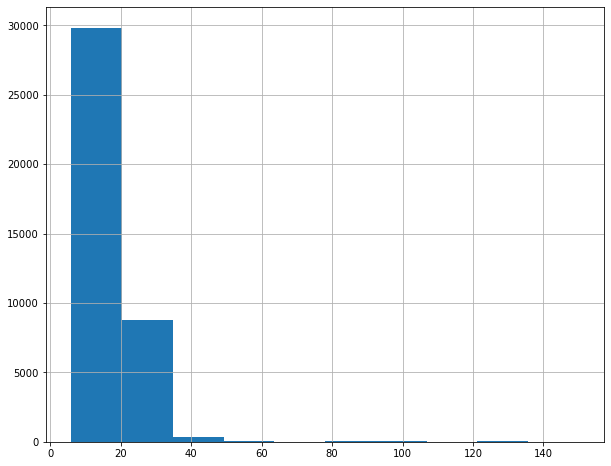

In [8]:
# plot the mileage per gallon MPG in city feature (city08)
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 8))
fueleco.city08.hist(ax=ax)


In [ ]:
### We will increase the number of bins in the histogram
### to see if the skew is hiding behaviors (as skew makes bins wider):

<AxesSubplot:>

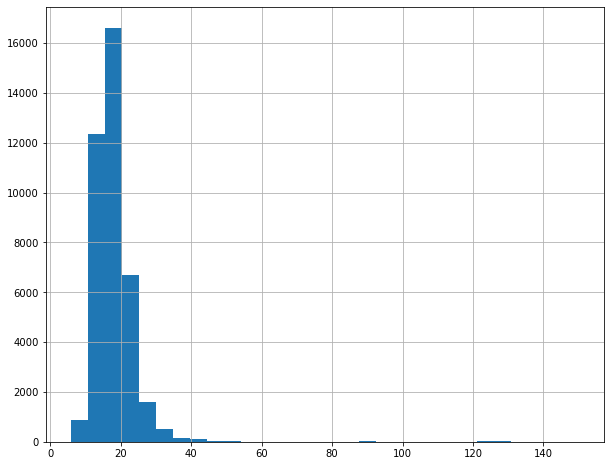

In [9]:
fig, ax = plt.subplots(figsize=(10, 8))
fueleco.city08.hist(ax=ax, bins=30)


In [10]:
# Use seaborn to create a distribution plot, which includes a histogram, a kernel
# density estimation (KDE), and a rug plot:

/home/saul/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/saul/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='city08', ylabel='Density'>

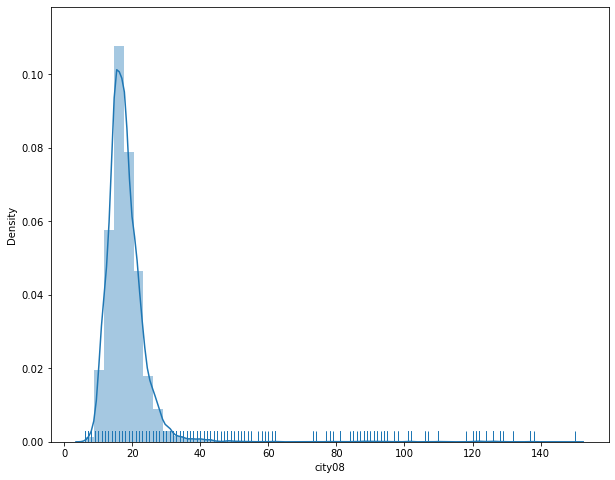

In [11]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.distplot(fueleco.city08, rug=True, ax=ax)


/home/saul/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/saul/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/saul/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='city08'>

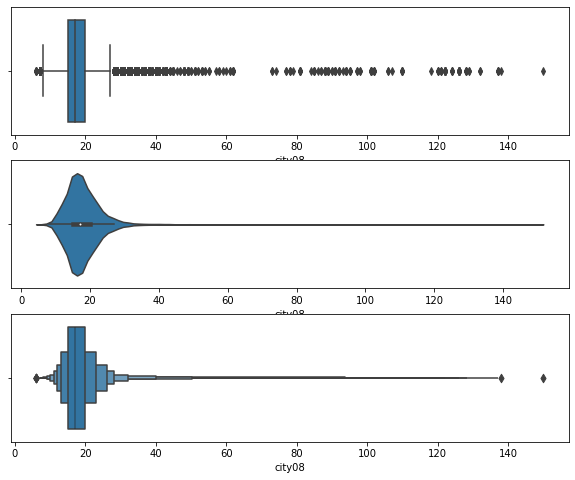

In [12]:
# In addition to the distplot function, there are functions for creating box plots, boxen plots, and violin plots.
fig, axs = plt.subplots(nrows=3, figsize=(10, 8))
sns.boxplot(fueleco.city08, ax=axs[0])
sns.violinplot(fueleco.city08, ax=axs[1])
sns.boxenplot(fueleco.city08, ax=axs[2])

### 1.2 Correlation bi/multi variate

#### Comparing continuous values across categories

In [13]:
# This section will show how to compare continuous variables in different categories. We will look at mileage numbers in
# different brands: Ford, Honda, Tesla, and BMW.

In [14]:
mask = fueleco.make.isin(['Ford', 'Honda', 'Tesla', 'BMW'])


In [16]:
# Calculate aggregate functions mean and std after grouping by make category

In [15]:
fueleco[mask].groupby('make').city08.agg(['mean', 'std'])

,mean,std
make,,
BMW,17.817377,7.372907
Ford,16.853803,6.701029
Honda,24.372973,9.154064
Tesla,92.826087,5.538970


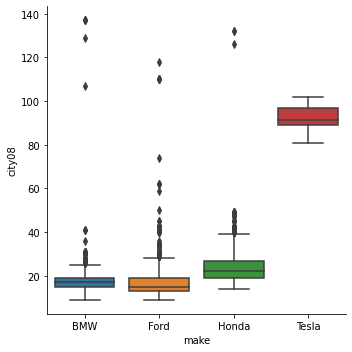

In [17]:
# Visualize the city08 values for each make with seaborn:
g = sns.catplot(x='make', y='city08', data=fueleco[mask], kind='box')


In [18]:
# One drawback of a boxplot is that while it indicates the spread of the data, it does not reveal
# how many samples are in each make.

# You might naively think that each boxplot has the same
# number of samples. We can quantify that this is not the case with pandas:

In [19]:
mask = fueleco.make.isin(['Ford', 'Honda', 'Tesla', 'BMW'])
(fueleco
  [mask]
  .groupby('make')
  .city08
  .count()
)

make
BMW      1807
Ford     3208
Honda     925
Tesla      46
Name: city08, dtype: int64

In [20]:
# Another option is to do a swarm plot on top of the box plots:

/home/saul/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 58.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/saul/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 67.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/saul/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 10.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='make', ylabel='city08'>

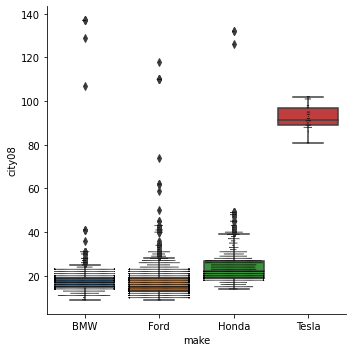

In [21]:
g = sns.catplot(x='make', y='city08', data=fueleco[mask], kind='box')
sns.swarmplot(x='make', y='city08', data=fueleco[mask], color='k', size=1, ax=g.ax)


In [22]:
# We are showing two dimensions right now, city mileage and make but we can add more dimensions to the plot.
# This can be done with the col parameter

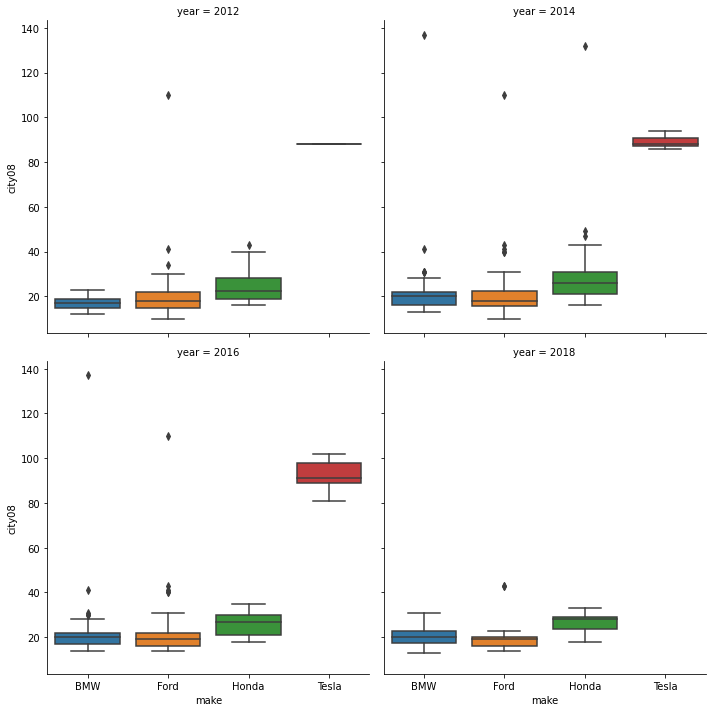

In [23]:
g = sns.catplot(x='make', y='city08', 
  data=fueleco[mask], kind='box',
  col='year', col_order=[2012, 2014, 2016, 2018],
  col_wrap=2)


In [24]:
## Alternatively, you can embed the new dimension in the same plot by using the hue parameter:

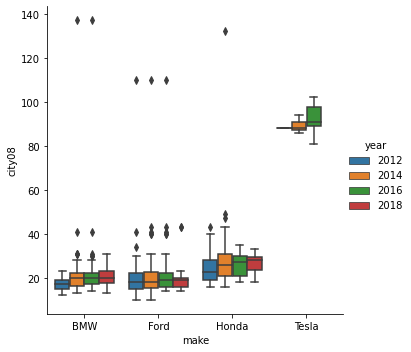

In [25]:
g = sns.catplot(x='make', y='city08', 
  data=fueleco[mask], kind='box',
  hue='year', hue_order=[2012, 2014, 2016, 2018])


#### Comparing Two Continuous Columns

#### Evaluating how two continuous columns relate to one another is the essence of regression.
#### But it goes beyond that. If you have two columns with a high correlation to one another, often,
#### you may drop one of them as a redundant column. In this section, we will look at EDA for pairs
#### of continuous columns.

In [29]:
# Look at the Pearson correlation between the two numbers:
fueleco.city08.corr(fueleco.highway08)

0.9324945062284952

In [30]:
fueleco.city08.corr(fueleco.cylinders)

-0.7016548423827886

Pearson correlation tells us how one value impacts another. It is between -1 and 1. In this
case, we can see that there is a strong correlation between city mileage and highway mileage.
As you get better city mileage, you tend to get better highway mileage.

In [31]:
# Visualize the correlations in a heatmap:

In [32]:
corr = fueleco[['city08', 'highway08', 'cylinders']].corr()
mask = np.zeros_like(corr, dtype=np.bool)

/tmp/ipykernel_188534/1251482869.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


In [48]:
corr

,city08,highway08,cylinders
city08,1.000000,0.932495,-0.701655
highway08,0.932495,1.000000,-0.650621
cylinders,-0.701655,-0.650621,1.000000


<AxesSubplot:>

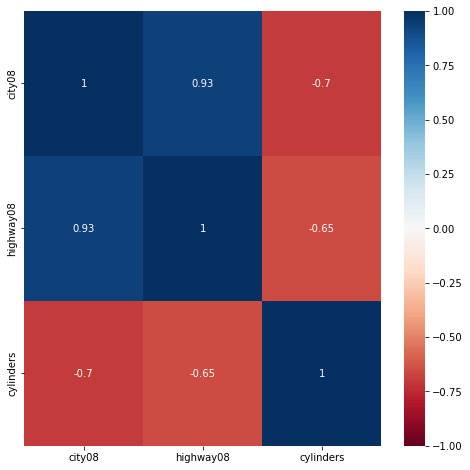

In [49]:
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(corr,
 annot=True, ax=ax, cmap='RdBu', vmin=-1, vmax=1,
)

In [50]:
# Use pandas to scatter plot the relationships:

<AxesSubplot:xlabel='city08', ylabel='highway08'>

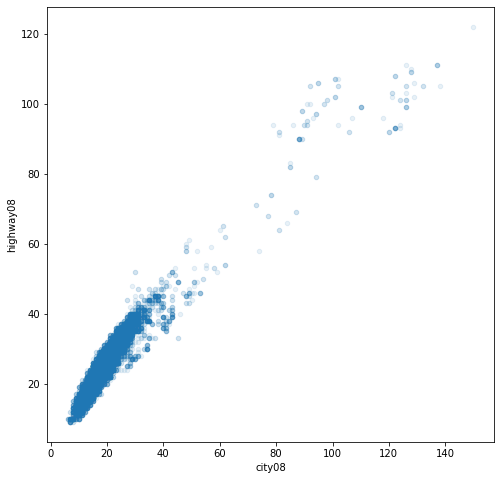

In [51]:
fig, ax = plt.subplots(figsize=(8,8))
fueleco.plot.scatter(x='city08', y='highway08', alpha=.1, ax=ax)


<AxesSubplot:xlabel='city08', ylabel='cylinders'>

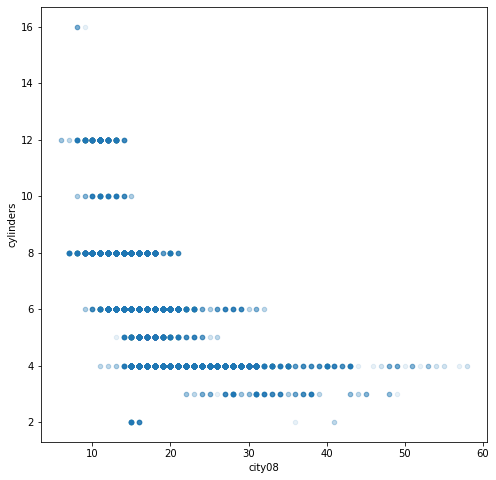

In [52]:
fig, ax = plt.subplots(figsize=(8,8))
fueleco.plot.scatter(x='city08', y='cylinders', alpha=.1, ax=ax)


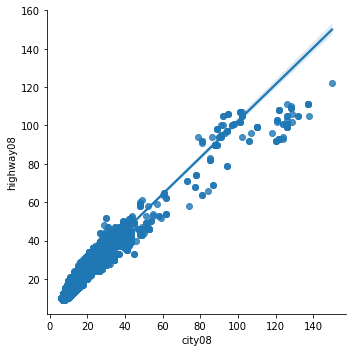

In [53]:
#Use seaborn lmplot to add a regression line to the relationships:
res = sns.lmplot(x='city08', y='highway08', data=fueleco)


### Multivariate correlation

If we have more variables that we want to compare, we can use seaborn to add more
dimensions to a scatter plot. Using the relplot function, we can color the dots by year and
size them by the number of barrels the vehicle consumes. 

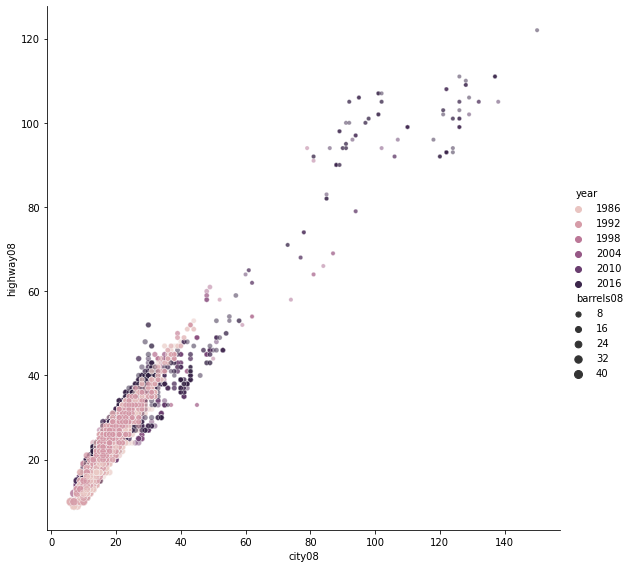

In [54]:
res = sns.relplot(x='city08', y='highway08',
   data=fueleco.assign(
       cylinders=fueleco.cylinders.fillna(0)),
   hue='year', size='barrels08', alpha=.5, height=8)

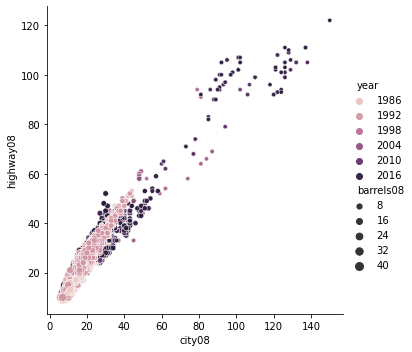

In [56]:
res = sns.relplot(x='city08', y='highway08',
   data=fueleco,
   hue='year', size='barrels08')

In [ ]:
# Note that we can also add in categorical dimensions as well for hue . We can also facet by 
# column for categorical values:

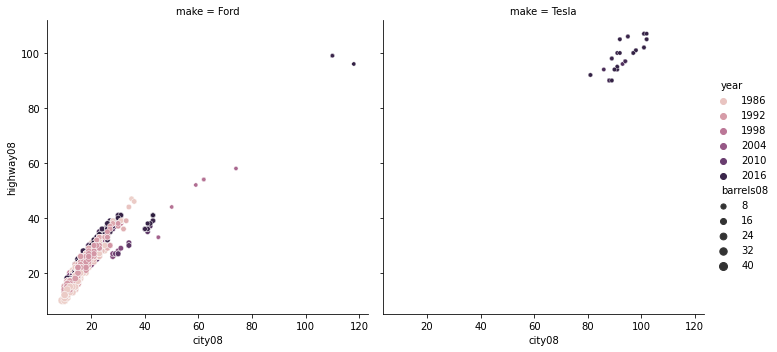

In [57]:
res = sns.relplot(x='city08', y='highway08',
  data=fueleco,
  hue='year', size='barrels08',
  col='make', col_order=['Ford', 'Tesla'])


Pearson correlation is intended to show the strength of a linear relationship. If the two
continuous columns do not have a linear relationship, another option is to use Spearman
correlation. This number also varies from -1 to 1. It measures whether the relationship is
monotonic (and doesn't presume that it is linear). It uses the rank of each number rather than
the number. If you are not sure whether there is a linear relationship between your columns,
this is a better metric to use.

In [58]:
fueleco.city08.corr(fueleco.barrels08, method='spearman')

-0.9743658763718624

#### Comparing Categorical and Categorical Values

In [65]:
# we select 4 makes and the drive variable
makes = ['Ford', 'Tesla', 'BMW', 'Toyota']
data_makes = fueleco[fueleco.make.isin(makes)]

In [71]:
#Contingency table: used for computing, chi2 and cramers'v coefficient
pd.crosstab(data_makes.make, data_makes.drive)

drive,2-Wheel Drive,4-Wheel Drive,4-Wheel or All-Wheel Drive,All-Wheel Drive,Front-Wheel Drive,Part-time 4-Wheel Drive,Rear-Wheel Drive
make,,,,,,,
BMW,0,0,148,353,2,0,1288
Ford,102,29,611,108,875,70,1328
Tesla,0,1,0,29,0,0,16
Toyota,27,15,385,76,819,95,511


## Using the Pandas Profiling Library

In [73]:
import pandas_profiling as pp


In [75]:
df_reduced = data_makes[['make', 'drive', 'city08', 'highway08', 'cylinders']]

In [76]:
df_reduced

,make,drive,city08,highway08,cylinders
7,Toyota,Front-Wheel Drive,23,26,4.0
8,Toyota,Front-Wheel Drive,23,31,4.0
9,Toyota,Front-Wheel Drive,23,30,4.0
10,Toyota,Front-Wheel Drive,23,30,4.0
20,BMW,Rear-Wheel Drive,14,20,8.0
...,...,...,...,...,...
39014,Ford,Front-Wheel Drive,26,35,4.0
39015,Ford,Front-Wheel Drive,19,25,4.0
39016,Ford,Front-Wheel Drive,21,30,4.0
39017,Ford,Front-Wheel Drive,18,22,6.0


In [78]:
pp.ProfileReport(df_reduced,     samples=None,
    missing_diagrams=None,
    duplicates=None,
    interactions=None,)

Summarize dataset:   0%|          | 0/20 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### 2. Feature selection

The methods based on F-test estimate the degree of linear dependency between two random variables. On the other hand, mutual information methods can capture any kind of statistical dependency, but being nonparametric, they require more samples for accurate estimation.

In [85]:
from sklearn.feature_selection import SelectKBest


#### ANOVA test

In [79]:
from sklearn.feature_selection import f_classif

In [80]:
filename = 'diabetes-pima.csv' 
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

df = pd.read_csv(filename, names=names)

In [81]:
df

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


The diabetes dataset contains numerical input variables and a binary categorical output.

In [82]:
df.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [83]:
array = df.values
X = array[:,0:8]
Y = array[:,8]

In [86]:
# feature extraction ANOVA
test_f = SelectKBest(score_func=f_classif, k=4)
fit = test_f.fit(X, Y)

In [88]:
# Original column names without the target name
feats = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']

# Print the scores
for feat, score in zip(feats, fit.scores_):

    print("Variable: ", feat, "| Score: ", score)

trans_features = fit.transform(X)
print("Tranformed features: ")
print(trans_features)

Variable:  preg | Score:  39.670227393616116
Variable:  plas | Score:  213.16175217803828
Variable:  pres | Score:  3.256950397889028
Variable:  skin | Score:  4.304380905008516
Variable:  test | Score:  13.281107531096337
Variable:  mass | Score:  71.7720721022405
Variable:  pedi | Score:  23.871300204344593
Variable:  age | Score:  46.140611238735865
Tranformed features: 
[[  6.  148.   33.6  50. ]
 [  1.   85.   26.6  31. ]
 [  8.  183.   23.3  32. ]
 ...
 [  5.  121.   26.2  30. ]
 [  1.  126.   30.1  47. ]
 [  1.   93.   30.4  23. ]]


/home/saul/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

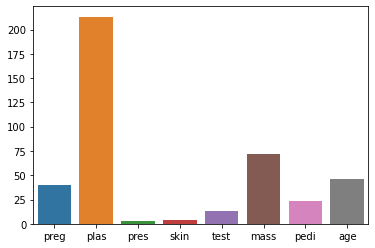

In [90]:
#plot the scores
sns.barplot(feats, fit.scores_)



#### Mutual information

In [91]:
from sklearn.feature_selection import mutual_info_classif

In [92]:
# feature extraction mutual information
test = SelectKBest(score_func=mutual_info_classif, k=4)
fit = test.fit(X, Y)


feats = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']

for feat, score in zip(feats, fit.scores_):

    print("Variable: ", feat, "| Score: ", score)

trans_features = fit.transform(X)
print("Tranformed features: ")
print(trans_features)

Variable:  preg | Score:  0.020188423931110533
Variable:  plas | Score:  0.11509093253446934
Variable:  pres | Score:  0.0
Variable:  skin | Score:  0.05688372664981034
Variable:  test | Score:  0.03140184084456288
Variable:  mass | Score:  0.07143018916917487
Variable:  pedi | Score:  0.008682022230908748
Variable:  age | Score:  0.04632308504396021
Tranformed features: 
[[148.   35.   33.6  50. ]
 [ 85.   29.   26.6  31. ]
 [183.    0.   23.3  32. ]
 ...
 [121.   23.   26.2  30. ]
 [126.    0.   30.1  47. ]
 [ 93.   31.   30.4  23. ]]


/home/saul/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

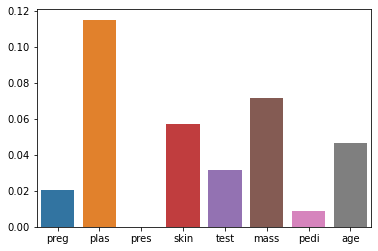

In [93]:
#plot
sns.barplot(feats, fit.scores_)

#### Alternative: PCA

In [94]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
X = array[:,0:8]
Y = array[:,8]

#Standarization
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# feature extraction
pca = PCA(n_components=3)
fit = pca.fit(X_std)
# summarize components
print("Explained Variance Ratio: ", fit.explained_variance_ratio_)
print("Transformed features: ")
print(pca.fit_transform(X_std))

Explained Variance Ratio:  [0.26179749 0.21640127 0.12870373]
Transformed features: 
[[ 1.06850273  1.23489499  0.09592984]
 [-1.12168331 -0.73385167 -0.71293816]
 [-0.39647671  1.59587594  1.76067844]
 ...
 [-0.28347525  0.09706503 -0.07719194]
 [-1.06032431  0.83706234  0.42503045]
 [-0.83989172 -1.15175485 -1.00917817]]
